In [1]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import xarray as xr
import numpy as np

In [2]:
# define plot parameters
parameters = {'font.size':22,
              'axes.labelsize': 22,
              'xtick.labelsize':22,
              'ytick.labelsize':22}
plt.rcParams.update(parameters)

In [3]:
# define colorbars
import matplotlib as mpl
def bwr():
    # define with RGBA
    bwr_colorbar = mpl.colors.ListedColormap(np.array([
            [0.0, 0.0, 1.0, 1.0],
            [0.2, 0.2, 1.0, 1.0],
            [0.4, 0.4, 1.0, 1.0],
            [0.8, 0.8, 1.0, 1.0],
            [1.0, 1.0, 1.0, 1.0],
            [1.0, 1.0, 1.0, 1.0],
            [1.0, 0.8, 0.8, 1.0],
            [1.0, 0.4, 0.4, 1.0],
            [1.0, 0.2, 0.2, 1.0],
            [1.0, 0.0, 0.0, 1.0]]))

    return bwr_colorbar
def pvmap():    
    PV_colorbar = mpl.colors.ListedColormap(np.array([
              [0,  0.600000023841858,   1.000000000000000],\
              [0.643137276172638, 0.772549033164978,   1.000000000000000], \
              [ 0.981176474094391,  0.981176474094391,   0.981176474094391], \
              [1.000000000000000,   1.000000000000000,  1.000000000000000], \
              [1.000000000000000,   0.564705908298492,   0.403921574354172], \
              [1.000000000000000,   0.301960796117783,   0.172549024224281], \
              [1.0000,    0.1686 ,         0],\
              [1.0000, 0.2667,0             ], \
              [1.0000  ,  0.3686         ,0], \
              [1.0000, 0.4529,  0], \
              [1.0000, 0.5333, 0], \
              [1.0000,  0.6000,  0], \
              [1.0000,    0.6745,         0], \
              [1.0000 ,   0.7255   ,      0], \
              [1.0000 ,   0.8275 ,   0.0039], \
              [1.0000 ,   0.9529  ,  0.0039], \
              [0.9882  ,  1.0000 ,   0.0275], \
              [0.8000 ,   1.0000, 0.2000]]))

    return PV_colorbar

read output data from PPVI and input data
--

In [4]:
data = xr.open_dataset('data/PVIout.nc').squeeze().transpose().sel(lon=slice(100,250))

In [5]:
data

<xarray.Dataset>
Dimensions:              (isobaricInhPa: 17, isobaricInhPa_NB: 2, lat: 56, lon: 151)
Coordinates:
  * lon                  (lon) float32 100.0 101.0 102.0 ... 248.0 249.0 250.0
  * lat                  (lat) float32 80.0 79.0 78.0 77.0 ... 27.0 26.0 25.0
  * isobaricInhPa        (isobaricInhPa) float64 900.0 850.0 ... 150.0 100.0
  * isobaricInhPa_NB     (isobaricInhPa_NB) int64 875 125
    time                 datetime64[ns] 2008-10-31T18:00:00
Data variables:
    U_velocity_of_BG     (isobaricInhPa, lat, lon) float64 ...
    V_velocity_of_BG     (isobaricInhPa, lat, lon) float64 ...
    Geopotential_BG      (isobaricInhPa, lat, lon) float64 ...
    PV_BG                (isobaricInhPa, lat, lon) float64 ...
    Temperature_BG       (isobaricInhPa_NB, lat, lon) float64 ...
    U_velocity_of_BAL    (isobaricInhPa, lat, lon) float64 ...
    V_velocity_of_BAL    (isobaricInhPa, lat, lon) float64 ...
    Geopotential_BAL     (isobaricInhPa, lat, lon) float64 ...
    PV_BAL

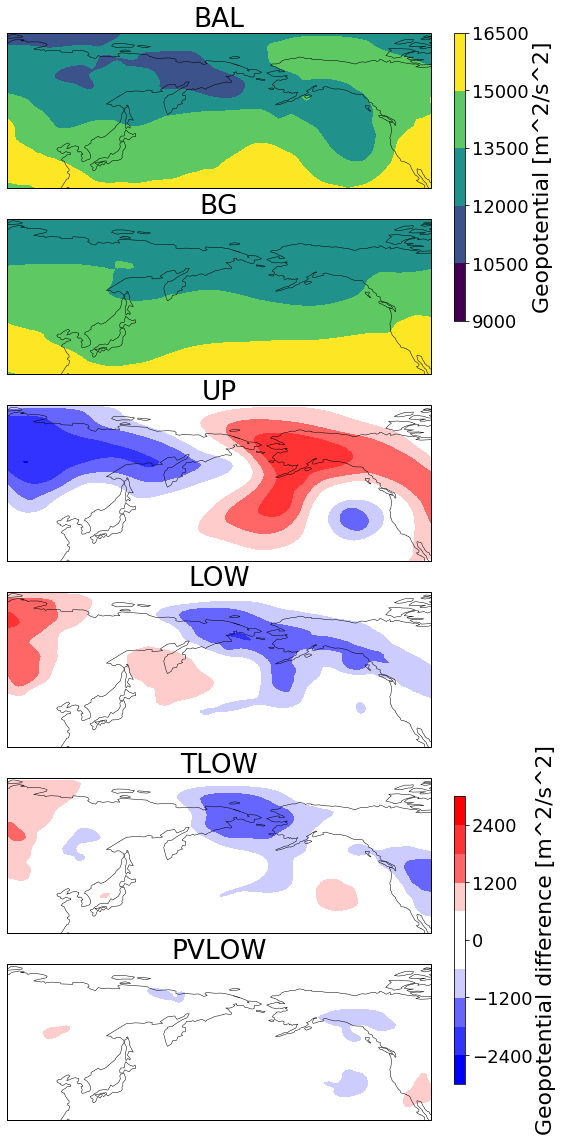

In [6]:
plt.close('all')
lon = data.lon.values
lat = data.lat.values
llon,llat = np.meshgrid(lon,lat)
level = 850
cen_lon = lon[int(np.floor(len(lon)/2))]

fig=plt.figure(figsize=[15,20])
ax1 = plt.subplot(6,1,1,projection=ccrs.PlateCarree(central_longitude=cen_lon, globe=None))
ax2 = plt.subplot(6,1,2,projection=ccrs.PlateCarree(central_longitude=cen_lon, globe=None))
ax3 = plt.subplot(6,1,3,projection=ccrs.PlateCarree(central_longitude=cen_lon, globe=None))
ax4 = plt.subplot(6,1,4,projection=ccrs.PlateCarree(central_longitude=cen_lon, globe=None))
ax5 = plt.subplot(6,1,5,projection=ccrs.PlateCarree(central_longitude=cen_lon, globe=None))
ax6 = plt.subplot(6,1,6,projection=ccrs.PlateCarree(central_longitude=cen_lon, globe=None))

# ------------------------------------------------------------------------------
# ##############################################################################

# ------------------------------------------------------------------------------
CS1 = data.sel(isobaricInhPa=level).Geopotential_BAL.plot.contourf(ax=ax1,transform=ccrs.PlateCarree(),levels=np.linspace(9000,16500,6),add_colorbar=False)
ax1.coastlines(resolution='110m', linewidth=0.5)
ax1.set_title('BAL')
# ------------------------------------------------------------------------------
data.sel(isobaricInhPa=level).Geopotential_BG.plot.contourf(ax=ax2,transform=ccrs.PlateCarree(),levels=np.linspace(9000,16500,6),add_colorbar=False)
ax2.coastlines(resolution='110m', linewidth=0.5)
ax2.set_title('BG')
# ------------------------------------------------------------------------------
CS4 = data.sel(isobaricInhPa=level).Geopotential_UP.plot.contourf(ax=ax3,transform=ccrs.PlateCarree(),levels=np.linspace(-3000,3000,11),extend='neither',add_colorbar=False,cmap=bwr())
ax3.coastlines(resolution='110m', linewidth=0.5)
ax3.set_title('UP')
# ------------------------------------------------------------------------------
data.sel(isobaricInhPa=level).Geopotential_LOW.plot.contourf(ax=ax4,transform=ccrs.PlateCarree(),levels=np.linspace(-3000,3000,11),extend='neither',add_colorbar=False,cmap=bwr())
ax4.coastlines(resolution='110m', linewidth=0.5)
ax4.set_title('LOW')
# ------------------------------------------------------------------------------
data.sel(isobaricInhPa=level).Geopotential_TLOW.plot.contourf(ax=ax5,transform=ccrs.PlateCarree(),levels=np.linspace(-3000,3000,11),extend='neither',add_colorbar=False,cmap=bwr())
ax5.coastlines(resolution='110m', linewidth=0.5)
ax5.set_title('TLOW')
# ------------------------------------------------------------------------------# ------------------------------------------------------------------------------
data.sel(isobaricInhPa=level).Geopotential_PVLOW.plot.contourf(ax=ax6,transform=ccrs.PlateCarree(),levels=np.linspace(-3000,3000,11),extend='neither',add_colorbar=False,cmap=bwr())
ax6.coastlines(resolution='110m', linewidth=0.5)
ax6.set_title('PVLOW')
# ------------------------------------------------------------------------------

cbax = fig.add_axes([0.73, 0.68, 0.01, 0.2])  #[distance from left, distance from bottom, width, height] ,
cbar = plt.colorbar(CS1, cax = cbax, ax=ax1, orientation='vertical')
cbar.ax.tick_params(labelsize=18)
cbar.set_label("Geopotential [m^2/s^2]", fontsize=22)

cbax2 = fig.add_axes([0.73, 0.15, 0.01, 0.2])  #[distance from left, distance from bottom, width, height] ,
cbar2 = plt.colorbar(CS4, cax = cbax2, ax=ax1, orientation='vertical')
cbar2.ax.tick_params(labelsize=18)
cbar2.set_label("Geopotential difference [m^2/s^2]", fontsize=22)

plot PV and assocciated wind field
--

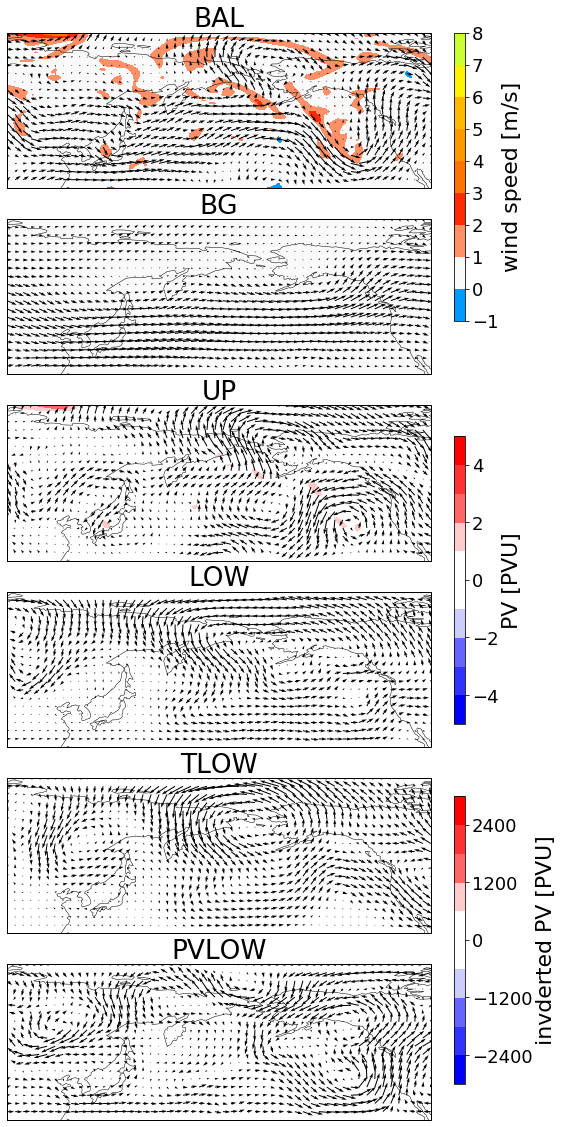

In [8]:
level = 500
maxUV = np.round(np.max(np.hypot(data.sel(isobaricInhPa=level).U_velocity_of_BAL,
                                 data.sel(isobaricInhPa=level).V_velocity_of_BAL)),-1)

fig=plt.figure(figsize=[15,20])
ax1 = plt.subplot(6,1,1,projection=ccrs.PlateCarree(central_longitude=cen_lon, globe=None))
ax2 = plt.subplot(612,projection=ccrs.PlateCarree(central_longitude=cen_lon, globe=None))
ax3 = plt.subplot(613,projection=ccrs.PlateCarree(central_longitude=cen_lon, globe=None))
ax4 = plt.subplot(614,projection=ccrs.PlateCarree(central_longitude=cen_lon, globe=None))
ax5 = plt.subplot(615,projection=ccrs.PlateCarree(central_longitude=cen_lon, globe=None))
ax6 = plt.subplot(616,projection=ccrs.PlateCarree(central_longitude=cen_lon, globe=None))

# ------------------------------------------------------------------------------
# ##############################################################################
# ------------------------------------------------------------------------------

# ------------------------------------------------------------------------------
CS1 = data.sel(isobaricInhPa=level).PV_BAL.plot.contourf(ax=ax1,transform=ccrs.PlateCarree(),levels=(-1,0,1,2,3,4,5,6,7,8),add_colorbar=False,cmap=pvmap())
ax1.quiver(llon[::3,::3],llat[::3,::3],
               data.sel(isobaricInhPa=level).U_velocity_of_BAL.values[::3,::3],
               data.sel(isobaricInhPa=level).V_velocity_of_BAL.values[::3,::3],
               transform=ccrs.PlateCarree(),regrid_shape=20)

#data.sel(isobaricInhPa=level).Geopotential_BAL.plot.contourf(ax=ax2,transform=ccrs.PlateCarree(),levels=np.linspace(9000,16500,6),add_colorbar=False)
ax1.coastlines(resolution='110m', linewidth=0.5)
ax1.set_title('BAL')
# ------------------------------------------------------------------------------
data.sel(isobaricInhPa=level).PV_BG.plot.contourf(ax=ax2,transform=ccrs.PlateCarree(),levels=(-1,0,1,2,3,4,5,6,7,8),add_colorbar=False,cmap=pvmap())
ax2.quiver(llon[::3,::3],llat[::3,::3],
               data.sel(isobaricInhPa=level).U_velocity_of_BG.values[::3,::3],
               data.sel(isobaricInhPa=level).V_velocity_of_BG.values[::3,::3],
               transform=ccrs.PlateCarree(),regrid_shape=20)
ax2.coastlines(resolution='110m', linewidth=0.5)
ax2.set_title('BG')
# ------------------------------------------------------------------------------
CS2 = data.sel(isobaricInhPa=level).PV_UP.plot.contourf(ax=ax3,transform=ccrs.PlateCarree(),
                                                        levels=(-5,-4,-3,-2,-1,0,1,2,3,4,5),
                                                        add_colorbar=False,cmap=bwr())
ax3.quiver(llon[::3,::3],llat[::3,::3],
               data.sel(isobaricInhPa=level).U_velocity_of_UP.values[::3,::3],
               data.sel(isobaricInhPa=level).V_velocity_of_UP.values[::3,::3],
               transform=ccrs.PlateCarree(),regrid_shape=20)
ax3.coastlines(resolution='110m', linewidth=0.5)
ax3.set_title('UP')
# ------------------------------------------------------------------------------
(data.sel(isobaricInhPa=level).PV_LOW).plot.contourf(ax=ax4,transform=ccrs.PlateCarree(),
                                                        levels=(-5,-4,-3,-2,-1,0,1,2,3,4,5),
                                                        add_colorbar=False,cmap=bwr())
ax4.quiver(llon[::3,::3],llat[::3,::3],
               data.sel(isobaricInhPa=level).U_velocity_of_LOW.values[::3,::3],
               data.sel(isobaricInhPa=level).V_velocity_of_LOW.values[::3,::3],
               transform=ccrs.PlateCarree(),regrid_shape=20)

ax4.coastlines(resolution='110m', linewidth=0.5)
ax4.set_title('TPVLOW')
# ------------------------------------------------------------------------------
(data.sel(isobaricInhPa=level).PV_TLOW).plot.contourf(ax=ax5,transform=ccrs.PlateCarree(),
                                                        levels=(-5,-4,-3,-2,-1,0,1,2,3,4,5),
                                                        add_colorbar=False,cmap=bwr())
ax5.quiver(llon[::3,::3],llat[::3,::3],
               data.sel(isobaricInhPa=level).U_velocity_of_TLOW.values[::3,::3],
               data.sel(isobaricInhPa=level).V_velocity_of_TLOW.values[::3,::3],
               transform=ccrs.PlateCarree(),regrid_shape=20)

ax5.coastlines(resolution='110m', linewidth=0.5)
ax5.set_title('TLOW')
# ------------------------------------------------------------------------------
(data.sel(isobaricInhPa=level).PV_PVLOW).plot.contourf(ax=ax6,transform=ccrs.PlateCarree(),
                                                        levels=(-5,-4,-3,-2,-1,0,1,2,3,4,5),
                                                        add_colorbar=False,cmap=bwr())
ax6.quiver(llon[::3,::3],llat[::3,::3],
               data.sel(isobaricInhPa=level).U_velocity_of_PVLOW.values[::3,::3],
               data.sel(isobaricInhPa=level).V_velocity_of_PVLOW.values[::3,::3],
               transform=ccrs.PlateCarree(),regrid_shape=20)

ax6.coastlines(resolution='110m', linewidth=0.5)
ax6.set_title('PVLOW')
# ------------------------------------------------------------------------------

cbax = fig.add_axes([0.73, 0.68, 0.01, 0.2])  #[distance from left, distance from bottom, width, height] ,
cbar = plt.colorbar(CS1, cax = cbax, ax=ax1, orientation='vertical')
cbar.ax.tick_params(labelsize=18)
cbar.set_label("wind speed [m/s]", fontsize=22)

cbax2 = fig.add_axes([0.73, 0.4, 0.01, 0.2])  #[distance from left, distance from bottom, width, height] ,
cbar2 = plt.colorbar(CS2, cax = cbax2, ax=ax1, orientation='vertical')
cbar2.ax.tick_params(labelsize=18)
cbar2.set_label("PV [PVU]", fontsize=22)

cbax3 = fig.add_axes([0.73, 0.15, 0.01, 0.2])  #[distance from left, distance from bottom, width, height] ,
cbar3 = plt.colorbar(CS4, cax = cbax3, ax=ax1, orientation='vertical')
cbar3.ax.tick_params(labelsize=18)
cbar3.set_label("invderted PV [PVU]", fontsize=22)

plot nonlinear component
--

In [8]:
data = xr.open_dataset('data/PVIout.nc').squeeze().transpose()

Text(0.5, 1.0, 'V_res')

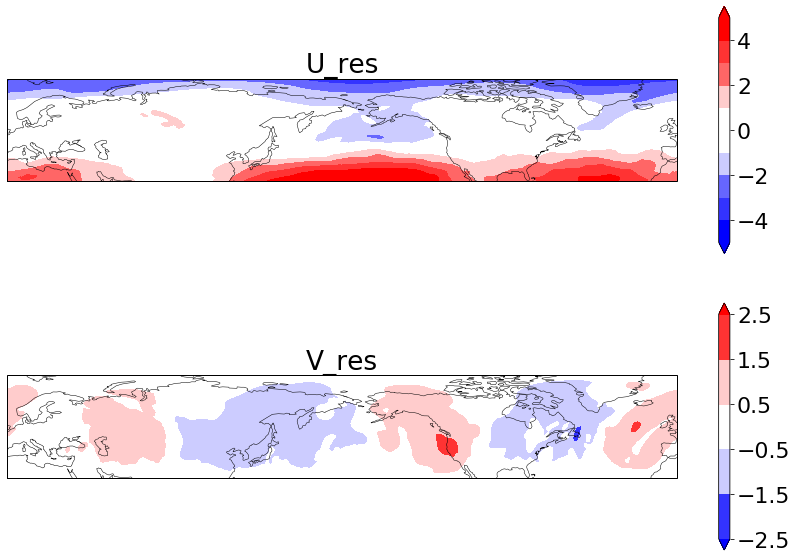

In [24]:
level = 250
maxUV = np.round(np.max(np.hypot(data.sel(isobaricInhPa=level).U_velocity_of_BAL,
                                 data.sel(isobaricInhPa=level).V_velocity_of_BAL)),-1)

U_res = data.U_velocity_of_BAL-data.U_velocity_of_BG-data.U_velocity_of_LOW-data.U_velocity_of_UP
V_res = data.V_velocity_of_BAL-data.V_velocity_of_BG-data.V_velocity_of_LOW-data.V_velocity_of_UP

fig=plt.figure(figsize=[15,10])
ax1 = plt.subplot(2,1,1,projection=ccrs.PlateCarree(central_longitude=180, globe=None))
ax2 = plt.subplot(212,projection=ccrs.PlateCarree(central_longitude=180, globe=None))

# ------------------------------------------------------------------------------
# ##############################################################################
# ------------------------------------------------------------------------------

# ------------------------------------------------------------------------------
U_res.sel(isobaricInhPa=level).plot.contourf(ax=ax1,transform=ccrs.PlateCarree(),levels=np.linspace(-5,5,11),
                                                   add_colorbar=True,cmap=bwr(),extend='both')

#data.sel(isobaricInhPa=level).Geopotential_BAL.plot.contourf(ax=ax2,transform=ccrs.PlateCarree(),levels=np.linspace(9000,16500,6),add_colorbar=False)
ax1.coastlines(resolution='110m', linewidth=0.5)
ax1.set_title('U_res')
# ------------------------------------------------------------------------------
V_res.sel(isobaricInhPa=level).plot.contourf(ax=ax2,transform=ccrs.PlateCarree(),levels=np.linspace(-2.5,2.5,6),
                                                   add_colorbar=True,cmap=bwr(),extend='both')

ax2.coastlines(resolution='110m', linewidth=0.5)
ax2.set_title('V_res')
# ------------------------------------------------------------------------------